In [115]:
from bs4 import BeautifulSoup
from selenium import webdriver

chromedriver_path = "/Users/AliBaba/downloads/chromedriver"

browser = webdriver.Chrome(chromedriver_path)

In [2]:
def extract_price_info(start_day, end_day, url_dict, num_days):
    start_date = datetime.datetime.strptime(start_day, '%Y-%m-%d')
    end_date = datetime.datetime.strptime(end_day, '%Y-%m-%d')

    front_url = url_dict['front_url']
    middle_url = url_dict['middle_url']
    back_url = url_dict['back_url']
    
    fare_list = []
    
    for i in range(num_days):
        start = str(start_date).split()[0]
        end = str(end_date).split()[0]
        
        variable_url = front_url + start + middle_url + end + back_url
    
        cards = get_cards_via_soup(variable_url)
        day_dict = {}
        for card in cards:
            city, fare = convert_key_val(card)
            day_dict[city] = int(fare)
        
        series = pd.Series(day_dict)
        df = pd.DataFrame(series, columns=[start])
        fare_list.append(df)
        
        start_date = start_date + timedelta(days=1)
        end_date = end_date + timedelta(days=1)
    
    return fare_list

In [3]:
def print_countries_extracted(prices_frame):
    print("These are the countries for which we were able to pull prices:\n")
    print(list(prices_frame.index))

In [4]:
def get_cards_via_soup(variable_url):
    sleep(np.random.randint(3,7))
    
    browser.get(variable_url)
    
    soup = BeautifulSoup(browser.page_source, 'html.parser')
    
    return soup.select('div[class*=info-container]')

In [5]:
def convert_key_val(card):
    pre_city = card.select('h3')[0].text
    city = str(pre_city)
    pre_fare = card.select('span[class*=price]')[0].text
    fare = str(pre_fare)
    #Need to do this in order to ensure clean dataframe when concat the series
    if fare == '':
        fare = '0'
    else:   #lets just get the comma and dollar sign out of the way
        fare = (fare.replace(',','').split('$')[1])
    return city, fare

In [6]:
def combine_days(frame_list):
    first = frame_list[0]
    
    if (len(frame_list) == 1):
        print_countries_extracted(first)
        return first
    
    for x in range(1, len(frame_list)):
        following = frame_list[x]
        frame = pd.concat([first, following], axis=1, sort=False)
        first = frame
    
    #provide a list of the countries pulled - so can just copy & paste
    print_countries_extracted(frame)
    
    return frame.fillna(0)

In [53]:
#this will walk through and only keep destinations under chosen price
def clean_extraction(dataframe, max_price):
    price_copy = dataframe.copy()
    for index, row in price_copy.iterrows():
        destination = row
        keep = False
        for price in destination:
            if price < max_price and price > 0:
                keep = True
        if(keep is False):
            price_copy = price_copy.drop([index])
    return price_copy

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def four_destination_scatter(price_data_frame, destinations):
    fig, ax = plt.subplots(2, 2, figsize=(12,10))
    axis_coord = [[0,0], [0,1], [1,0], [1,1]]
    x = 0
    colors = ['green', 'red', 'blue', 'orange']
    for destination in destinations:
        coords = axis_coord[x]
        x_vals = list(price_data_frame.columns)
        y_vals = list(price_data_frame.loc[destination])
        ax[coords[0], coords[1]].scatter(x_vals, y_vals, label = destination, color=colors[x])
        ax[coords[0], coords[1]].set_title("Prices for {}".format(destination))
        ax[coords[0], coords[1]].set_ylim([100,1100])
        x += 1   
    fig.autofmt_xdate()

In [8]:
#URL for three European regions
western_europe_url = {}
western_europe_url['front_url'] = 'https://www.google.com/flights?hl=en#flt=/m/0rh6k.r/m/0852h.'
western_europe_url['middle_url'] = '*r/m/0852h./m/0rh6k.'
western_europe_url['back_url'] = ';c:USD;e:1;ls:1w;sd:1;t:e'

southern_europe_url = {}
southern_europe_url['front_url'] = 'https://www.google.com/flights?hl=en#flt=/m/0rh6k.r/m/0250wj.'
southern_europe_url['middle_url'] = '*r/m/0250wj./m/0rh6k.'
southern_europe_url['back_url'] = ';c:USD;e:1;ls:1w;sd:1;t:e'

eastern_europe_url = {}
eastern_europe_url['front_url'] = 'https://www.google.com/flights?hl=en#flt=/m/0rh6k.r/m/09b69.'
eastern_europe_url['middle_url'] = '*r/m/09b69./m/0rh6k.'
eastern_europe_url['back_url'] = ';c:USD;e:1;ls:1w;sd:1;t:e'

In [127]:
#urls for countries
front_countries = 'https://www.google.com/flights?hl=en#flt=/m/0rh6k.r/m/'

germany_url = {}
germany_url['front_url'] = '0345h.'
germany_url['middle_url'] = '*r/m/0345h./m/0rh6k.'
germany_url['back_url'] = ';c:USD;e:1;sd:1;t:e'

italy_url = {}
italy_url['front_url'] = '03rjj.'
italy_url['middle_url'] = '*r/m/03rjj./m/0rh6k.'
italy_url['back_url'] = ';c:USD;e:1;sd:1;t:e'

france_url = {}
france_url['front_url'] = '0f8l9c.'
france_url['middle_url'] = '*r/m/0f8l9c./m/0rh6k.'
france_url['back_url'] = ';c:USD;e:1;sd:1;t:e'

turkey_url = {}
turkey_url['front_url'] = '01znc_.'
turkey_url['middle_url'] = '*r/m/01znc_./m/0rh6k.'
turkey_url['back_url'] = ';c:USD;e:1;sd:1;t:e'

greece_url = {}
greece_url['front_url'] = '035qy.'
greece_url['middle_url'] = '*r/m/035qy./m/0rh6k.'
greece_url['back_url'] = ';c:USD;e:1;sd:1;t:e'

In [132]:
countries = {
    'germany' : germany_url,
    'italy' : italy_url,
    'france' : france_url,
    'turkey' : turkey_url,
    'greece' : greece_url,
}

In [81]:
def extract_country_price(start_day, end_day, url_dict, num_days):
    start_date = datetime.datetime.strptime(start_day, '%Y-%m-%d')
    end_date = datetime.datetime.strptime(end_day, '%Y-%m-%d')

    front = url_dict['front_url']
    middle_url = url_dict['middle_url']
    back_url = url_dict['back_url']
    
    fare_list = []
    
    for i in range(num_days):
        start = str(start_date).split()[0]
        end = str(end_date).split()[0]
        
        front_url = front_countries + front
        
        variable_url = front_url + start + middle_url + end + back_url
    
        cards = get_cards_via_soup(variable_url)
        day_dict = {}
        for card in cards:
            city, fare = convert_key_val(card)
            day_dict[city] = int(fare)
        
        series = pd.Series(day_dict)
        df = pd.DataFrame(series, columns=[start])
        fare_list.append(df)
        
        start_date = start_date + timedelta(days=1)
        end_date = end_date + timedelta(days=1)
    
    return fare_list

In [106]:
germany_prices = extract_country_price(start_day, end_day, germany_url, 7)

In [109]:
germany = combine_days(germany_prices)
germany_final = clean_extraction(germany, 800)
germany_final

These are the countries for which we were able to pull prices:

['Rome', 'Milan', 'Venice', 'Naples', 'Florence', 'Catania', 'Bologna', 'Pisa', 'Palermo', 'Genoa', 'Verona', 'Bari', 'Turin', 'Trieste', 'Brindisi', 'Reggio Calabria', 'Lamezia Terme', 'Ancona', 'Cagliari', 'Olbia', 'Trapani', 'Perugia', 'Pescara', 'Lampedusa', 'Frankfurt', 'Munich', 'Berlin', 'Stuttgart', 'Hamburg', 'Düsseldorf', 'Cologne', 'Nuremberg', 'Hanover', 'Bremen', 'Dortmund', 'Leipzig', 'Saarbrücken', 'Dresden', 'Friedrichshafen', 'Münster', 'Westerland', 'Paderborn', 'Rostock', 'Karlsruhe', 'Baden-Baden']


,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09
Milan,799.0,0.0,0.0,0.0,0.0,0.0,0.0
Venice,793.0,0.0,0.0,0.0,0.0,0.0,0.0
Frankfurt,0.0,972.0,829.0,717.0,789.0,789.0,790.0
Munich,0.0,868.0,733.0,693.0,668.0,668.0,698.0
Berlin,0.0,867.0,768.0,728.0,728.0,728.0,758.0


In [154]:
def country_price_pipeline(country, num_days, max_price):
    country_prices = extract_country_price(start_day, end_day, countries[str(country)], num_days)
    prices_full = combine_days(country_prices)
    country_final = clean_extraction(prices_full, max_price)
    return country_final, prices_full

In [155]:
germany_final, germany_full = country_price_pipeline('germany', 7, 750)
germany_final

These are the countries for which we were able to pull prices:

['Frankfurt', 'Munich', 'Berlin', 'Stuttgart', 'Hamburg', 'Düsseldorf', 'Cologne', 'Nuremberg', 'Hanover', 'Bremen', 'Dortmund', 'Leipzig', 'Saarbrücken', 'Dresden', 'Friedrichshafen', 'Münster', 'Westerland', 'Heringsdorf', 'Paderborn', 'Karlsruhe', 'Baden-Baden', 'Rostock']


,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09
Frankfurt,859.0,972.0,717.0,789.0,789.0,789.0,789.0
Munich,763.0,868.0,693.0,668.0,668.0,668.0,698.0
Berlin,798.0,867.0,728.0,728.0,728.0,728.0,758.0


In [104]:
italy_prices = extract_country_price(start_day, end_day, italy_url, 7)

In [107]:
italy = combine_days(italy_prices)
italy_final = clean_extraction(italy, 800)
italy_final

These are the countries for which we were able to pull prices:

['Rome', 'Milan', 'Venice', 'Naples', 'Florence', 'Catania', 'Bologna', 'Pisa', 'Palermo', 'Genoa', 'Verona', 'Bari', 'Turin', 'Trieste', 'Brindisi', 'Reggio Calabria', 'Lamezia Terme', 'Alghero', 'Ancona', 'Cagliari', 'Olbia', 'Trapani', 'Perugia', 'Pescara', 'Lampedusa']


,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09
Rome,711.0,821.0,821.0,711.0,778,726.0,861.0
Milan,812.0,844.0,844.0,804.0,804,699.0,799.0
Venice,1042.0,888.0,888.0,798.0,758,693.0,793.0


In [112]:
france_prices = extract_country_price(start_day, end_day, france_url, 7)

In [113]:
france = combine_days(france_prices)
france_final = clean_extraction(france, 900)
france_final

These are the countries for which we were able to pull prices:

['Paris', 'Nice', 'Marseille', 'Lyon', 'Bordeaux', 'Strasbourg', 'Biarritz', 'Toulouse', 'Nantes', 'Brest', 'Bastia', 'Clermont-Ferrand', 'Lorient', 'Montpellier', 'Pau', 'Rennes', 'Toulon', 'Lille', 'Ajaccio', 'Aurillac', 'Brive-la-Gaillarde', 'Caen', 'Calvi', 'Chambéry', 'Castres', 'Nancy', 'Figari', 'Lourdes', 'La Rochelle', 'Perpignan', 'Bergerac']


,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09
Paris,746.0,746.0,727.0,663.0,703.0,698.0,788.0
Nice,679.0,679.0,621.0,594.0,593.0,627.0,709.0
Marseille,1087.0,1087.0,0.0,893.0,1074.0,950.0,1283.0
Bordeaux,880.0,880.0,1379.0,1162.0,1075.0,1073.0,1429.0
Strasbourg,800.0,800.0,1484.0,1158.0,1133.0,1300.0,1405.0
Toulouse,1279.0,1279.0,1237.0,1078.0,864.0,884.0,1237.0


In [128]:
turkey_prices = extract_country_price(start_day, end_day, turkey_url, 7)

In [129]:
turkey = combine_days(turkey_prices)
turkey_final = clean_extraction(turkey, 900)
turkey_final

These are the countries for which we were able to pull prices:

['İstanbul', 'Ankara', 'Antalya', 'İzmir', 'Bodrum', 'Adana', 'Adıyaman', 'Ağrı', 'Kayseri', 'Batman', 'Bingöl', 'Diyarbakır', 'Dalaman', 'Denizli', 'Edremit', 'Erzincan', 'Erzurum', 'Elâzığ', 'Şanlıurfa', 'Gazipaşa', 'Gaziantep', 'Hatay', 'Iğdır', 'Isparta', 'Kahramanmaraş', 'Kastamonu', 'Kars', 'Konya', 'Kütahya', 'Malatya', 'Mardin', 'Muş', 'Amasya', 'Nevşehir', 'Şırnak', 'Sinop', 'Giresun', 'Samsun', 'Trabzon', 'Van', 'Çanakkale', 'Zonguldak']


,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09
İstanbul,961.0,916.0,896.0,859.0,838.0,827.0,961.0


In [121]:
greece_prices = extract_country_price(start_day, end_day, greece_url, 7)

In [125]:
greece = combine_days(greece_prices)
grec_final = clean_extraction(greece, 900)
grec_final

These are the countries for which we were able to pull prices:

['Athens', 'Santorini', 'Thessaloniki', 'Rhodes', 'Mykonos', 'Corfu', 'Heraklion', 'Kos', 'Kalamata', 'Chania', 'Karpathos', 'Alexandroupoli', 'Cephalonia', 'Ioannina', 'Chios', 'Naxos', 'Kythira', 'Kavala', 'Kastellorizo', 'Lemnos', 'Mitilini', 'Plaka', 'Paros', 'Samos', 'Zakynthos Island', 'Icaria', 'Sitia', 'Skiathos', 'Leros', 'Skyros']


,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09
Athens,0,901.0,867.0,784.0,784.0,784.0,904.0
Thessaloniki,0,913.0,0.0,0.0,799.0,799.0,829.0


In [9]:
import numpy as np
import pandas as pd
import datetime
from datetime import date, timedelta
from time import sleep

#Here you get to pick the days you want to use
start_day = '2020-04-3'
end_day = '2020-04-12'

In [10]:
eastern_europe_prices = extract_price_info(start_day, end_day,
                                          eastern_europe_url, num_days=7)

In [56]:
western_europe_prices = extract_price_info(start_day, end_day,
                                          western_europe_url, num_days=7)

In [57]:
southern_europe_prices = extract_price_info(start_day, end_day,
                                          southern_europe_url, num_days=7)

In [58]:
ee_prices = combine_days(eastern_europe_prices)

These are the countries for which we were able to pull prices:

['Moscow', 'Prague', 'Budapest', 'Kyiv', 'Warsaw', 'Bucharest', 'Sofia', 'Saint Petersburg', 'Kraków', 'Minsk', 'Chisinau', 'Riga', 'Vilnius', 'Tallinn', 'Wrocław', 'Gdańsk', 'Lviv', 'Sochi', 'Bydgoszcz', 'Cluj-Napoca', 'Constanța', 'Dnipro', 'Kharkiv', 'Iași', 'Kherson', 'Krasnodar', 'Košice', 'Katowice', 'Samara', 'Kazan', 'Łódź', 'Odesa', 'Zaporizhzhia', 'Poznań', 'Rostov-on-Don', 'Rzeszow', 'Sibiu', 'Timișoara', 'Ufa', 'Varna', 'Debrecen', 'Palanga', 'Voronezh', 'Szczecin', 'Lublin', 'Bratislava', 'Makhachkala', 'Mineralnye Vody']


In [59]:
we_prices = combine_days(western_europe_prices)

These are the countries for which we were able to pull prices:

['Moscow', 'Prague', 'Budapest', 'Kyiv', 'Warsaw', 'Bucharest', 'Sofia', 'Saint Petersburg', 'Kraków', 'Minsk', 'Chisinau', 'Riga', 'Vilnius', 'Tallinn', 'Wrocław', 'Gdańsk', 'Lviv', 'Sochi', 'Bratislava', 'Bydgoszcz', 'Cluj-Napoca', 'Dnipro', 'Kharkiv', 'Iași', 'Kherson', 'Krasnodar', 'Katowice', 'Samara', 'Kazan', 'Mineralnye Vody', 'Odesa', 'Zaporizhzhia', 'Palanga', 'Poznań', 'Rostov-on-Don', 'Rzeszow', 'Sibiu', 'Timișoara', 'Ufa', 'Varna', 'London', 'Paris', 'Amsterdam', 'Frankfurt', 'Dublin', 'Lisbon', 'Munich', 'Brussels', 'Vienna', 'Zürich', 'Geneva', 'Barcelona', 'Madrid', 'Berlin', 'Edinburgh', 'Manchester', 'Nice', 'Glasgow', 'Ibiza', 'Ponta Delgada', 'Shannon', 'Málaga', 'Stuttgart', 'Hamburg', 'Seville', 'Düsseldorf', 'Luxembourg', 'Birmingham', 'Porto', 'Palma', 'Valencia', 'Marseille', 'Lyon', 'Terceira Island', 'Bordeaux', 'Strasbourg', 'Tenerife', 'Belfast', 'Biarritz', 'Cardiff']


In [60]:
se_prices = combine_days(eastern_europe_prices)

These are the countries for which we were able to pull prices:

['Moscow', 'Prague', 'Budapest', 'Kyiv', 'Warsaw', 'Bucharest', 'Sofia', 'Saint Petersburg', 'Kraków', 'Minsk', 'Chisinau', 'Riga', 'Vilnius', 'Tallinn', 'Wrocław', 'Gdańsk', 'Lviv', 'Sochi', 'Bydgoszcz', 'Cluj-Napoca', 'Constanța', 'Dnipro', 'Kharkiv', 'Iași', 'Kherson', 'Krasnodar', 'Košice', 'Katowice', 'Samara', 'Kazan', 'Łódź', 'Odesa', 'Zaporizhzhia', 'Poznań', 'Rostov-on-Don', 'Rzeszow', 'Sibiu', 'Timișoara', 'Ufa', 'Varna', 'Debrecen', 'Palanga', 'Voronezh', 'Szczecin', 'Lublin', 'Bratislava', 'Makhachkala', 'Mineralnye Vody']


In [61]:
ee_final = clean_extraction(ee_prices, 800)
ee_final

,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09
Moscow,786.0,786.0,678.0,676.0,651.0,692.0,695.0
Prague,1022.0,1022.0,886.0,846.0,846.0,786.0,876.0
Budapest,783.0,783.0,791.0,751.0,751.0,751.0,781.0
Kyiv,680.0,680.0,690.0,689.0,677.0,677.0,677.0
Warsaw,899.0,899.0,882.0,829.0,817.0,694.0,882.0
Sofia,676.0,676.0,676.0,674.0,674.0,674.0,672.0
Saint Petersburg,953.0,953.0,1004.0,844.0,701.0,0.0,794.0
Chisinau,780.0,780.0,740.0,700.0,659.0,659.0,689.0
Lviv,843.0,843.0,739.0,699.0,699.0,842.0,729.0
Sochi,717.0,717.0,677.0,0.0,637.0,637.0,667.0


In [64]:
we_final = clean_extraction(we_prices, 700)
we_final

,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09
Kyiv,682.0,0.0,0.0,0.0,0.0,0.0,0.0
Sofia,674.0,0.0,0.0,0.0,0.0,0.0,0.0
Kazan,690.0,0.0,0.0,0.0,0.0,0.0,0.0
London,0.0,726.0,589.0,547.0,547.0,547.0,624.0
Paris,0.0,746.0,727.0,663.0,703.0,703.0,698.0
Amsterdam,0.0,837.0,741.0,601.0,701.0,701.0,717.0
Dublin,0.0,924.0,730.0,661.0,690.0,681.0,752.0
Lisbon,0.0,581.0,582.0,558.0,555.0,556.0,575.0
Munich,0.0,868.0,733.0,693.0,668.0,668.0,698.0
Barcelona,0.0,920.0,838.0,684.0,684.0,684.0,787.0


In [65]:
se_final = clean_extraction(se_prices, 700)
se_final

,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09
Moscow,786.0,786.0,678.0,676.0,651.0,692.0,695.0
Kyiv,680.0,680.0,690.0,689.0,677.0,677.0,677.0
Warsaw,899.0,899.0,882.0,829.0,817.0,694.0,882.0
Sofia,676.0,676.0,676.0,674.0,674.0,674.0,672.0
Chisinau,780.0,780.0,740.0,700.0,659.0,659.0,689.0
Lviv,843.0,843.0,739.0,699.0,699.0,842.0,729.0
Sochi,717.0,717.0,677.0,0.0,637.0,637.0,667.0


In [23]:
for x in first:
    if x < 700 and x > 0:
        print("meow")

meow
meow
meow
meow
meow


In [72]:
meow_half = ee_prices.append(we_prices)
meow = meow_half.append(se_prices)
meow

,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09
Rome,988.0,0.0,0.0,0.0,0.0,0.0,0.0
Lisbon,719.0,0.0,0.0,0.0,0.0,0.0,0.0
Barcelona,1356.0,0.0,0.0,0.0,0.0,0.0,0.0
Madrid,1297.0,0.0,0.0,0.0,0.0,0.0,0.0
Milan,1359.0,0.0,0.0,0.0,0.0,0.0,0.0
Venice,1358.0,0.0,0.0,0.0,0.0,0.0,0.0
Naples,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Florence,1346.0,0.0,0.0,0.0,0.0,0.0,0.0
Ibiza,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ponta Delgada,3479.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
for index, row in meow.iterrows():
    print(index)
    break

Rome


In [95]:
yo = meow.loc['Lisbon']
yo

,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09
Lisbon,719.0,0.0,0.0,0.0,0.0,0.0,0.0
Lisbon,0.0,649.0,582.0,0.0,555.0,556.0,575.0
Lisbon,719.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
for index, row in yo.iterrows():
    row.combine(row, min)

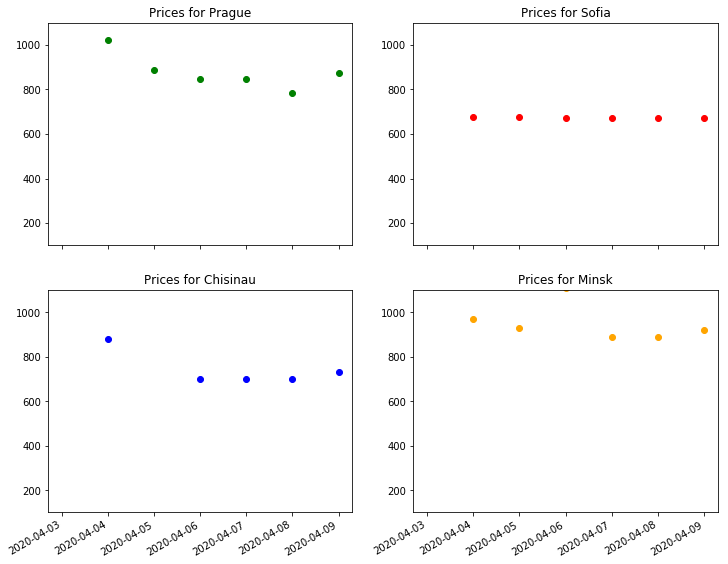

In [66]:
#pull four destinat ions from the list above and feed to scatter fxn
destinations = ['Prague', 'Sofia', 'Chisinau', 'Minsk']
four_destination_scatter(ee_prices, destinations)

In [67]:
#plot all on a single plot - can handle > 4 destinations
#THIS WON'T LOOK CLEAN IF INCLUDING DESTINATIONS WITH MISSING VALUES
def dest_single_plot(price_data_frame, destinations):
    fig = plt.figure(figsize=(10,6))
    for destination in destinations:
        x_vals = list(price_data_frame.columns)
        y_vals = list(price_data_frame.loc[destination])
        plt.plot(x_vals, y_vals, label=destination)

    plt.ylim([200, 1500])
    fig.autofmt_xdate()
    plt.legend(loc='best')

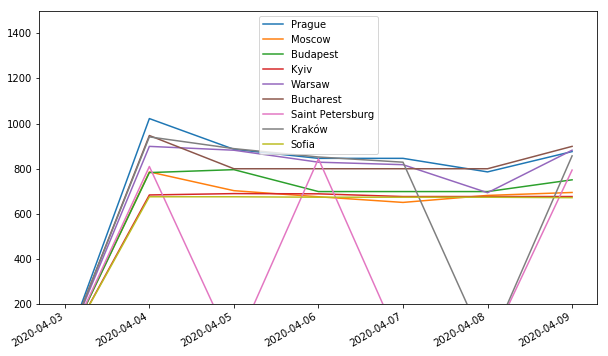

In [68]:
bigger_destinations = ['Prague', 'Moscow', 'Budapest', 'Kyiv', 
                       'Warsaw', 'Bucharest','Saint Petersburg', 
                       'Kraków', 'Sofia']
dest_single_plot(ee_prices, bigger_destinations)

In [15]:
ee_prices

,2020-03-29,2020-03-30,2020-03-31,2020-04-01,2020-04-02,2020-04-03,2020-04-04,2020-04-05,2020-04-06,2020-04-07,2020-04-08,2020-04-09,2020-04-10,2020-04-11
Moscow,657.0,657.0,643.0,634.0,651.0,695.0,682.0,678.0,708.0,676.0,676.0,695.0,695.0,695.0
Prague,765.0,765.0,772.0,846.0,871.0,842.0,930.0,961.0,862.0,846.0,846.0,846.0,847.0,842.0
Budapest,796.0,796.0,781.0,699.0,699.0,729.0,783.0,796.0,783.0,721.0,721.0,699.0,751.0,796.0
Kyiv,677.0,677.0,689.0,689.0,677.0,680.0,680.0,677.0,691.0,689.0,689.0,677.0,682.0,677.0
Warsaw,814.0,814.0,826.0,694.0,818.0,844.0,904.0,932.0,832.0,826.0,826.0,832.0,872.0,857.0
Bucharest,752.0,752.0,697.0,697.0,800.0,800.0,939.0,949.0,811.0,800.0,800.0,800.0,899.0,812.0
Sofia,676.0,676.0,676.0,674.0,674.0,674.0,674.0,674.0,672.0,674.0,674.0,672.0,674.0,674.0
Saint Petersburg,781.0,781.0,660.0,712.0,0.0,0.0,828.0,0.0,0.0,0.0,701.0,794.0,803.0,844.0
Kraków,887.0,887.0,0.0,839.0,829.0,0.0,941.0,0.0,0.0,0.0,0.0,829.0,843.0,0.0
Minsk,1126.0,1126.0,889.0,968.0,889.0,919.0,0.0,0.0,0.0,0.0,0.0,889.0,919.0,959.0
